In [1]:
%matplotlib inline 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [90]:
results_hdt_10M = pd.read_csv("hdt/output_time_hdt_10M.log", names=["query", "_time"])

results_hdt_10M['t'] = results_hdt_10M._time.apply(lambda x: datetime.datetime.strptime(x,' %M:%S.%f'))
results_hdt_10M['td'] = results_hdt_10M.t - datetime.datetime.strptime('00:00.0','%M:%S.%f')
results_hdt_10M['time'] = results_hdt_10M['td'].apply(lambda x: x / np.timedelta64(1, 's'))

results_hdt_10M.drop(['t', 'td', '_time'], inplace=True, axis=1)
results_hdt_10M["query"] = results_hdt_10M["query"].str.extract(r'watdiv/watdiv/bin/Release/datasets/10M/gen_queries/gen_queries_([0-9]+_.*)\.txt')
results_hdt_10M["query_type"] = results_hdt_10M["query"].str.replace(r"[0-9]+_", "")

# Averages per query type
averages_hdt_10M = results_hdt_10M.groupby(["query_type"]).mean()
averages_hdt_10M["query_class"] = averages_hdt_10M.index.str.replace(r"[0-9]", "")

# Averages per query class
averages_class_hdt_10M = averages_hdt_10M.groupby(["query_class"]).mean()

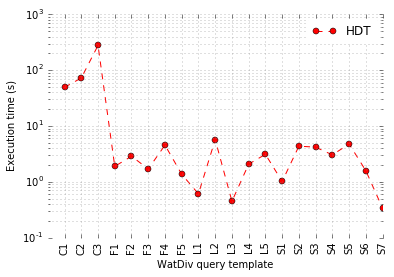

In [88]:
# Grid lines
hdt, = plt.semilogy(range(1, averages_hdt_10M.index.shape[0]+1), averages_hdt_10M["time"], 'r--o')
#impala, = plt.semilogy(range(1, results["query_template"].shape[0]+1), results["Impala"], 'g--o')
#spark, = plt.semilogy(range(1, results["query_template"].shape[0]+1), results["Spark"], 'b--o')

plt.ylabel("Execution time (s)")
plt.xlabel("WatDiv query template")
plt.xticks(range(1, averages_hdt_10M.index.shape[0]+1), averages_hdt_10M.index, rotation="vertical")
plt.grid(True, which="both", color="gray")

legend = plt.legend([hdt], ["HDT"])
frame = legend.get_frame()
frame.set_color('white')

plt.gca().spines['bottom'].set_color('white')
plt.gca().spines['top'].set_color('white') 
plt.gca().spines['right'].set_color('white')
plt.gca().spines['left'].set_color('white')

plt.savefig("line_plot.eps")
#plt.show()

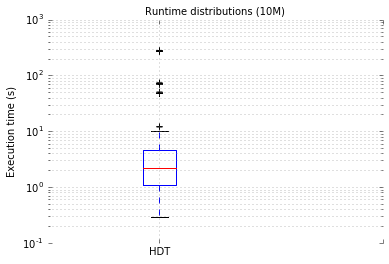

In [89]:
#ax = results_impala_100K["sec"].plot.box(return_type="axes")
temp = pd.DataFrame()
temp["hdt"] = results_hdt_10M["time"]
#plt.boxplot(temp)
temp.plot.box()
plt.yscale('log')
plt.xticks(range(1, 3), ["HDT"])

plt.gca().spines['bottom'].set_color('white')
plt.gca().spines['top'].set_color('white') 
plt.gca().spines['right'].set_color('white')
plt.gca().spines['left'].set_color('white')

#plt.boxplot(results_impala_100K["secs"])
plt.grid(True, which="both", color="gray")
plt.ylabel("Execution time (s)")
plt.xlabel("Runtime distributions (10M)")
plt.gca().xaxis.set_label_position('top') 

plt.savefig("boxplot.eps")

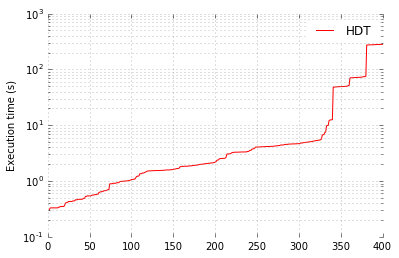

In [92]:
# Grid lines
sorted_results_hdt_10M = results_hdt_10M.sort_values(["time"])

hdt, = plt.semilogy(range(1, results_hdt_10M.index.shape[0]+1), sorted_results_hdt_10M["time"], 'r-')
#impala, = plt.semilogy(range(1, results["query_template"].shape[0]+1), results["Impala"], 'g--o')
#spark, = plt.semilogy(range(1, results["query_template"].shape[0]+1), results["Spark"], 'b--o')

plt.ylabel("Execution time (s)")
#plt.xlabel("WatDiv query template")
#plt.xticks(range(1, averages_hdt_10M.index.shape[0]+1), averages_hdt_10M.index, rotation="vertical")
plt.grid(True, which="both", color="gray")

legend = plt.legend([hdt], ["HDT"])
frame = legend.get_frame()
frame.set_color('white')

plt.gca().spines['bottom'].set_color('white')
plt.gca().spines['top'].set_color('white') 
plt.gca().spines['right'].set_color('white')
plt.gca().spines['left'].set_color('white')

plt.savefig("line_plot_2.eps")
#plt.show()

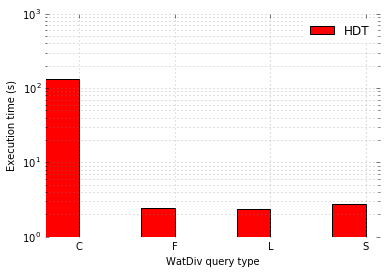

In [113]:
fig, ax = plt.subplots()

ind = np.arange(averages_class_hdt_10M.index.shape[0])  # the x locations for the groups
width = 0.35       # the width of the bars

hdt = ax.bar(ind, averages_class_hdt_10M.time, width, color='r', log=True)

plt.ylabel("Execution time (s)")
plt.xlabel("WatDiv query type")
ax.set_xticks(ind + width)
ax.set_xticklabels(averages_class_hdt_10M.index)
plt.grid(True, which="both", color="gray")

legend = plt.legend([hdt], ["HDT"])
frame = legend.get_frame()
frame.set_color('white')

plt.gca().spines['bottom'].set_color('white')
plt.gca().spines['top'].set_color('white') 
plt.gca().spines['right'].set_color('white')
plt.gca().spines['left'].set_color('white')

plt.show()

In [5]:
# Boxplot
results_spark_100K = pd.read_csv("output_time_spark_100k.log", names=["query", "time"])
results_impala_100K = pd.read_csv("output_time_impala_100k.log", names=["query", "time"])

In [6]:
results_spark_100K.head(n=5)

,query,time
0,watdiv/watdiv/bin/Release/gen_queries/gen_quer...,0:24.14
1,watdiv/watdiv/bin/Release/gen_queries/gen_quer...,0:02.36
2,watdiv/watdiv/bin/Release/gen_queries/gen_quer...,0:42.21
3,watdiv/watdiv/bin/Release/gen_queries/gen_quer...,0:01.86
4,watdiv/watdiv/bin/Release/gen_queries/gen_quer...,0:17.33


In [7]:
results_impala_100K.head(n=5)

,query,time
0,watdiv/watdiv/bin/Release/gen_queries/gen_quer...,0:51.76
1,watdiv/watdiv/bin/Release/gen_queries/gen_quer...,0:13.45
2,watdiv/watdiv/bin/Release/gen_queries/gen_quer...,22:33.87
3,watdiv/watdiv/bin/Release/gen_queries/gen_quer...,0:11.33
4,watdiv/watdiv/bin/Release/gen_queries/gen_quer...,0:17.25


In [8]:
results_impala_100K['t'] = results_impala_100K.time.apply(lambda x: datetime.datetime.strptime(x,' %M:%S.%f'))
results_impala_100K['td'] = results_impala_100K.t - datetime.datetime.strptime('00:00.0','%M:%S.%f')
results_impala_100K['sec'] = results_impala_100K['td'].apply(lambda x: x / np.timedelta64(1, 's'))

In [9]:
results_spark_100K['t'] = results_spark_100K.time.apply(lambda x: datetime.datetime.strptime(x,' %M:%S.%f'))
results_spark_100K['td'] = results_spark_100K.t - datetime.datetime.strptime('00:00.0','%M:%S.%f')
results_spark_100K['sec'] = results_spark_100K['td'].apply(lambda x: x / np.timedelta64(1, 's'))

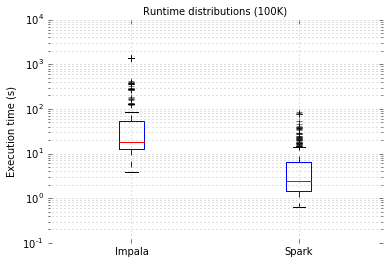

In [10]:
#ax = results_impala_100K["sec"].plot.box(return_type="axes")
temp = pd.DataFrame()
temp["impala"] = results_impala_100K["sec"]
temp["spark"] =  results_spark_100K["sec"]
#plt.boxplot(temp)
temp.plot.box()
plt.yscale('log')
plt.xticks(range(1, 3), ["Impala", "Spark"])

plt.gca().spines['bottom'].set_color('white')
plt.gca().spines['top'].set_color('white') 
plt.gca().spines['right'].set_color('white')
plt.gca().spines['left'].set_color('white')

#plt.boxplot(results_impala_100K["secs"])
plt.grid(True, which="both", color="gray")
plt.ylabel("Execution time (s)")
plt.xlabel("Runtime distributions (100K)")
plt.gca().xaxis.set_label_position('top') 

plt.savefig("boxplot.eps")

In [14]:
# Sorted per type of query
results_impala_100K["query"].str.contains("C")
results_impala_100K["query"].str.contains("L")
results_impala_100K["query"].str.contains("F")



0      False
1      False
2      False
3       True
4       True
5       True
6       True
7       True
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23      True
24      True
25      True
26      True
27      True
28     False
29     False
       ...  
273    False
274    False
275    False
276    False
277    False
278    False
279    False
280    False
281    False
282    False
283     True
284     True
285     True
286     True
287     True
288    False
289    False
290    False
291    False
292    False
293    False
294    False
295    False
296    False
297    False
298    False
299    False
300    False
301    False
302    False
Name: query, dtype: bool

In [ ]:
# Sorted per execution time